<a href="https://colab.research.google.com/github/pko89403/DeepLearningSelfStudy/blob/master/RNN_longseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch

In [0]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [0]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

In [9]:
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  print(i, x_str, '->', y_str)
  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [12]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

# transform as tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
X.shape

torch.Size([170, 10, 25])

In [0]:
# declare RNN + FC
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
      super(Net, self).__init__()
      self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
      self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [0]:
net = Net(dic_size, hidden_size, layers=2)

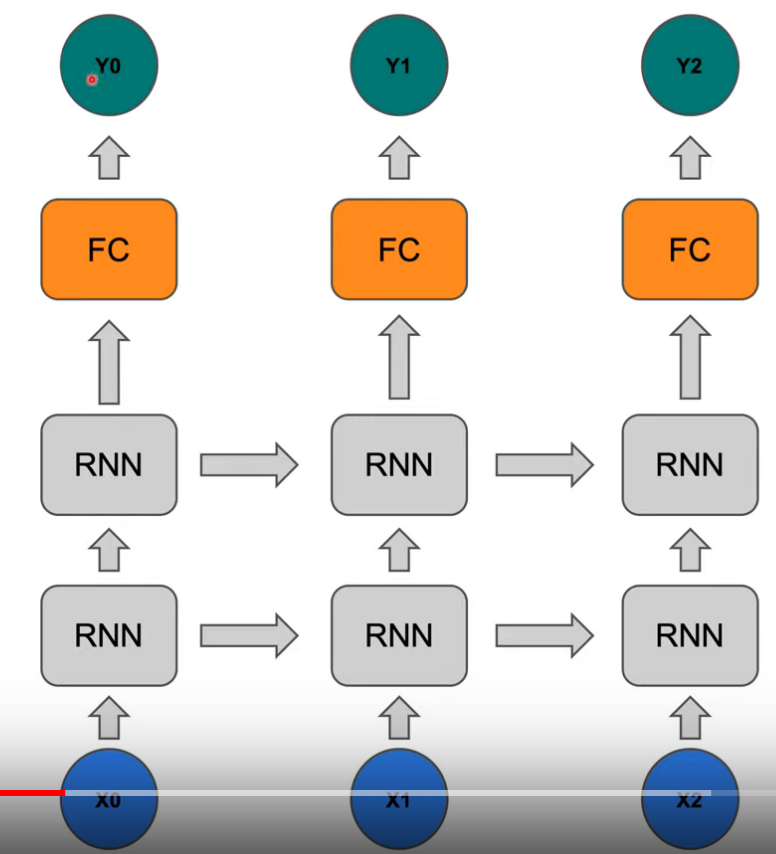

In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), learning_rate)

In [18]:
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  results = outputs.argmax(dim=2)
  predict_str = ""
  for j, result in enumerate(results):
    print(i, j, ''.join([char_set[t] for t in result]), loss.item())
    if j == 0:
      predict_str += ''.join([char_set[t] for t in result])
    else:
      predict_str += char_set[result[-1]]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
70 101  tnd work, 0.3108729124069214
70 102 tnd work,  0.3108729124069214
70 103 nd dork, b 0.3108729124069214
70 104 d dork, bu 0.3108729124069214
70 105  aork, but 0.3108729124069214
70 106 took, but  0.3108729124069214
70 107 ork, but r 0.3108729124069214
70 108  k, but ra 0.3108729124069214
70 109  , but rat 0.3108729124069214
70 110 s but rath 0.3108729124069214
70 111  but rathe 0.3108729124069214
70 112 tut rather 0.3108729124069214
70 113 ui rather  0.3108729124069214
70 114 m rather t 0.3108729124069214
70 115 haather te 0.3108729124069214
70 116 tather tea 0.3108729124069214
70 117  ther teac 0.3108729124069214
70 118 nher teach 0.3108729124069214
70 119 hem teach  0.3108729124069214
70 120 em teach t 0.3108729124069214
70 121 o teach th 0.3108729124069214
70 122  teach the 0.3108729124069214
70 123 toach them 0.3108729124069214
70 124 hach them  0.3108729124069214
70 125 och them t 0.3108729124069214
70 126 nh them to 0.3108729124069214
70